In [1]:
import numpy as np
from ReadBinary import *

E = GetSTArrayFrom2DArrayTimeSamples("E-x.data")
E = E[:, 0, :, :]


number of arrays:  802.0
Type code :  2
Type size :  8
Shape :  (1, 801, 801)
size_total :  5132844
total bytes :  4116540888


In [18]:
shape = E.shape
print("shape : ", shape)

Nt, Ny, Nz = shape
print("Nt: {},   Ny: {},   Nz: {}".format(Nt, Ny, Nz))

E_ty = np.sum(E, axis=2)/Nz

Nky, Nkz = 100, 100
Nw = 100

ky_max, kz_max = np.pi, np.pi
w_max = 10.0

w = np.linspace(0, w_max, Nw)
ky = np.linspace(0, ky_max, Nky)
E_f = np.zeros((Nw, Nky), dtype=complex)

S = 0.99
dy = 10/Ny
dz = 10/Nz
dt = dy/np.sqrt(2)*S

t = np.linspace(0.0, Nt*dt, Nt, endpoint=True)
y = np.linspace(0.0, Ny*dy, Nt)

t_mesh, y_mesh = np.meshgrid(t, y, indexing="ij")

for i in range(Nw):
    w_i = w[i]
    print(i, end=" ")
    for j in range(Nky):
        ky_j = ky[j]
        E_f[i, j] = np.sum(E_ty[ind_t, ind_y]*np.exp(1j*w_i*t_mesh - 1j*ky_j*y_mesh))
        
E_f *= dt*dy/(2.0*np.pi)**2




shape :  (802, 801, 801)
Nt: 802,   Ny: 801,   Nz: 801
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

Populating the interactive namespace from numpy and matplotlib


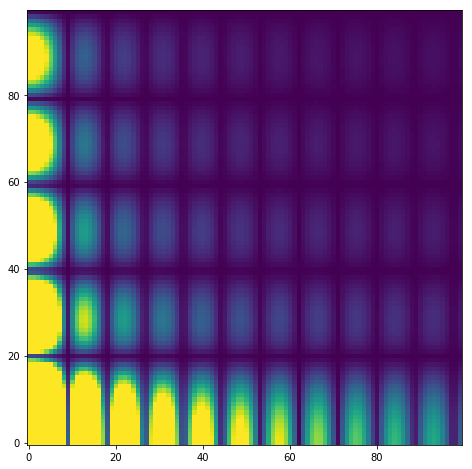

In [28]:
%pylab inline
figsize(8, 8)

E_f_max = np.max(np.abs(E_f))

imshow(np.abs(E_f).T, vmax=0.05*E_f_max, origin="lower")


